# Titanic Data Analysis

1. Using data analysis methods, predict which metric or combination of metrics best predict passenger survivability.
2. A combination of data visualizations and statistics will be used to determine the most significant predictors of survivability.

#### Install Dependencies

In [39]:
!%pip install numpy
!%pip install pandas
!%pip install matplotlib

zsh:fg:1: no job control in this shell.
zsh:fg:1: no job control in this shell.
zsh:fg:1: no job control in this shell.


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Reading Dataset

In [41]:
titanic_df = pd.read_csv(
    'titanic-dataset.csv'
)[['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']]

titanic_df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [42]:
titanic_df.tail()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
886,0,2,male,27.0,0,13.00,S
887,1,1,female,19.0,0,30.00,S
888,0,3,female,NaN,2,23.45,S
889,1,1,male,26.0,0,30.00,C
890,0,3,male,32.0,0,7.75,Q


In [43]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


#### Cleaning Data

In [44]:
titanic_df['Sex_Numeric'] = (titanic_df['Sex'].astype('category')).cat.codes

In [45]:
grouped_survived = titanic_df.groupby(['Sex_Numeric', 'Pclass', 'Age', 'Embarked'], observed=False)

grouped_survived['Survived'].describe()

count  mean  std  min  25%  50%  75%  max
Sex_Numeric Pclass Age  Embarked                                           
0           1      2.0  S           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   14.0 S           1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0
                   15.0 S           1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0
                   16.0 C           1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        S           2.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
...                                 ...   ...  ...  ...  ...  ...  ...  ...
1           3      59.0 S           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   61.0 S           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   65.0 Q           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   70.5 Q           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                   74.0 S           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0

[367 rows x 8 columns]

In [46]:
# Create Survival Label Column
titanic_df['Survival'] = titanic_df.Survived.map(
    {0 : 'Died', 1 : 'Survived'}
)
titanic_df.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [47]:
# Create Pclass Label Column
titanic_df['Class'] = titanic_df.Pclass.map(
    {1 : '1st Class', 2 : '2nd Class', 3 : '3rd Class'}
)
titanic_df.Class.head()

0    3rd Class
1    1st Class
2    3rd Class
3    1st Class
4    3rd Class
Name: Class, dtype: object

In [48]:
# Create Sex Label Column
titanic_df['Gender'] = titanic_df.Sex.map(
    {'female' : 'Female', 'male' : 'Male'}
)
titanic_df.Gender.head()

0      Male
1    Female
2    Female
3    Female
4      Male
Name: Gender, dtype: object

In [49]:
# Replace blanks with NaN
titanic_df['Embarked'].replace(r'\s+', np.nan, regex=True).head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [50]:
# Create Port Label Column
titanic_df['Ports'] = titanic_df.Embarked.map(
    {'S' : 'Southhampton', 'C' : 'Cherbourg', 'Q' : 'Queenstown', np.nan : 'unknown'}
)
titanic_df.Ports.head()

0    Southhampton
1       Cherbourg
2    Southhampton
3    Southhampton
4    Southhampton
Name: Ports, dtype: object

#### Dataset Plot

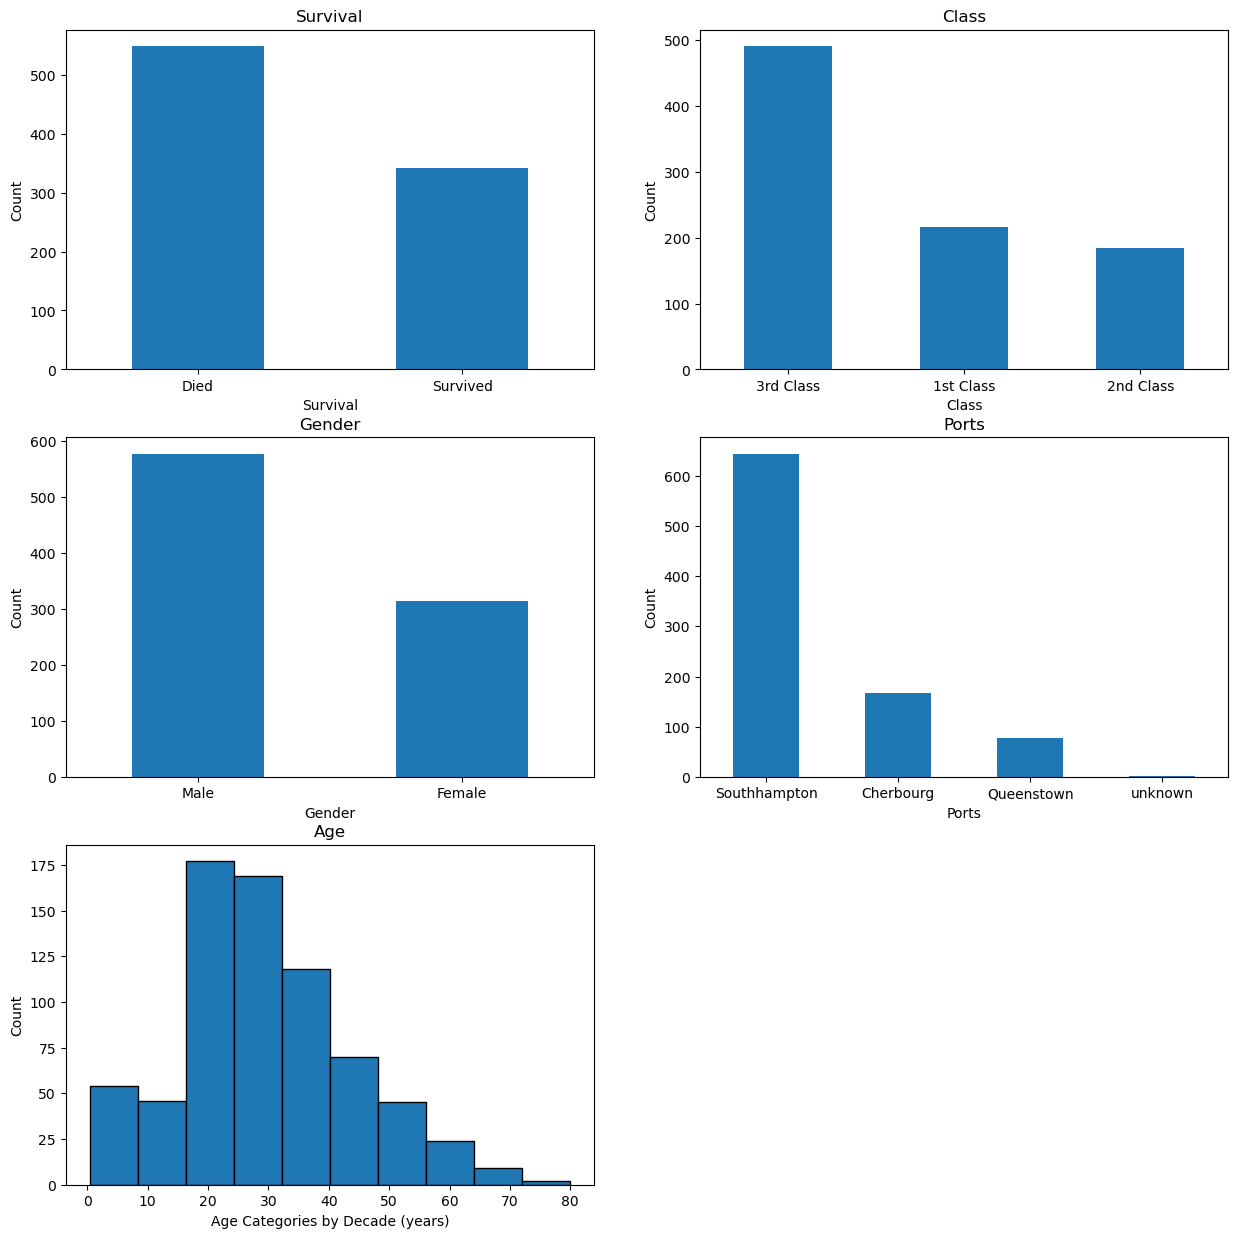

In [51]:
cols = ['Survival', 'Class', 'Gender', 'Ports']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

axes = axes.flat

for col, ax in zip(cols, axes):

    titanic_df[col].value_counts().plot(kind='bar', title=col, ax=ax, rot=0, ylabel='Count')

titanic_df['Age'].plot(kind='hist', ax=axes[4], ylabel='Count', xlabel='Age Categories by Decade (years)', ec='k', title='Age')

fig.delaxes(axes[5])

plt.show()

#### Age

In [52]:
# Passangers with no age

ageisnull = titanic_df[titanic_df['Age'].isnull()]
ageisnull.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Sex_Numeric,Survival,Class,Gender,Ports
5,0,3,male,NaN,0,8.4583,Q,1,Died,3rd Class,Male,Queenstown
17,1,2,male,NaN,0,13.0000,S,1,Survived,2nd Class,Male,Southhampton
19,1,3,female,NaN,0,7.2250,C,0,Survived,3rd Class,Female,Cherbourg
26,0,3,male,NaN,0,7.2250,C,1,Died,3rd Class,Male,Cherbourg
28,1,3,female,NaN,0,7.8792,Q,0,Survived,3rd Class,Female,Queenstown


In [53]:
print('Total passengers with no age: ', len(ageisnull))

Total passengers with no age:  177


In [54]:
# Mean age
titanic_df['Age'].mean()

29.69911764705882

In [55]:
# Mean age by Sex
(titanic_df.groupby(['Gender']))['Age'].mean()

Gender
Female    27.915709
Male      30.726645
Name: Age, dtype: float64

In [56]:
# Mean age by Pclass and Sex
(titanic_df.groupby(['Class', 'Gender']))['Age'].mean()

Class      Gender
1st Class  Female    34.611765
           Male      41.281386
2nd Class  Female    28.722973
           Male      30.740707
3rd Class  Female    21.750000
           Male      26.507589
Name: Age, dtype: float64

In [57]:
# Mean age by Pclass, Survived and Sex
(titanic_df.groupby(['Class', 'Survival', 'Gender']))['Age'].mean()

Class      Survival  Gender
1st Class  Died      Female    25.666667
                     Male      44.581967
           Survived  Female    34.939024
                     Male      36.248000
2nd Class  Died      Female    36.000000
                     Male      33.369048
           Survived  Female    28.080882
                     Male      16.022000
3rd Class  Died      Female    23.818182
                     Male      27.255814
           Survived  Female    19.329787
                     Male      22.274211
Name: Age, dtype: float64

In [58]:
# General statistics of Age by Class, Survival and Gender
(titanic_df.groupby(['Class', 'Survival', 'Gender']))['Age'].describe()

count       mean        std    min    25%   50%  \
Class     Survival Gender                                                    
1st Class Died     Female    3.0  25.666667  24.006943   2.00  13.50  25.0   
                   Male     61.0  44.581967  14.457749  18.00  33.00  45.5   
          Survived Female   82.0  34.939024  13.223014  14.00  23.25  35.0   
                   Male     40.0  36.248000  14.936744   0.92  27.00  36.0   
2nd Class Died     Female    6.0  36.000000  12.915107  24.00  26.25  32.5   
                   Male     84.0  33.369048  12.158125  16.00  24.75  30.5   
          Survived Female   68.0  28.080882  12.764693   2.00  21.75  28.0   
                   Male     15.0  16.022000  19.547122   0.67   1.00   3.0   
3rd Class Died     Female   55.0  23.818182  12.833465   2.00  15.25  22.0   
                   Male    215.0  27.255814  12.135707   1.00  20.00  25.0   
          Survived Female   47.0  19.329787  12.303246   0.75  13.50  19.0   
                   Male     38.0  22.274211  11.555786   0.42  16.50  25.0   

                             75%   max  
Class     Survival Gender               
1st Class Died     Female  37.50  50.0  
                   Male    56.00  71.0  
          Survived Female  44.00  63.0  
                   Male    48.00  80.0  
2nd Class Died     Female  42.50  57.0  
                   Male    39.00  70.0  
          Survived Female  35.25  55.0  
                   Male    31.50  62.0  
3rd Class Died     Female  31.00  48.0  
                   Male    34.00  74.0  
          Survived Female  26.50  63.0  
                   Male    29.75  45.0

In [59]:
# Survival count by Sex, Pclass and Age < 20
sex = titanic_df['Gender']
survived = titanic_df['Survival']
pclass = titanic_df['Class']
age_youth = titanic_df['Age'] < 20

pd.crosstab([sex, pclass, age_youth], survived)

Survival                Died  Survived
Gender Class     Age                  
Female 1st Class False     2        78
                 True      1        13
       2nd Class False     6        54
                 True      0        16
       3rd Class False    51        48
                 True     21        24
Male   1st Class False    74        41
                 True      3         4
       2nd Class False    82         7
                 True      9        10
       3rd Class False   249        35
                 True     51        12

In [60]:
# Maintain Age and create Age_Fill (populate missing ages)
titanic_df['Age_Fill'] = titanic_df['Age']

In [61]:
titanic_df['Age_Fill'] = titanic_df['Age_Fill'] \
    .groupby([titanic_df['Pclass'], titanic_df['Survived'], titanic_df['Sex']], observed=False) \
    .transform(lambda x: x.fillna(x.mean())).to_frame()

In [62]:
# Example of Age_Fill - #5, 17 & 19
print(titanic_df['Age'].head(20))
print(titanic_df['Age_Fill'].head(20))

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64
0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     27.255814
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    16.022000
18    31.000000
19    19.329787
Name: Age_Fill, dtype: float64


#### Age Histogram Comparison

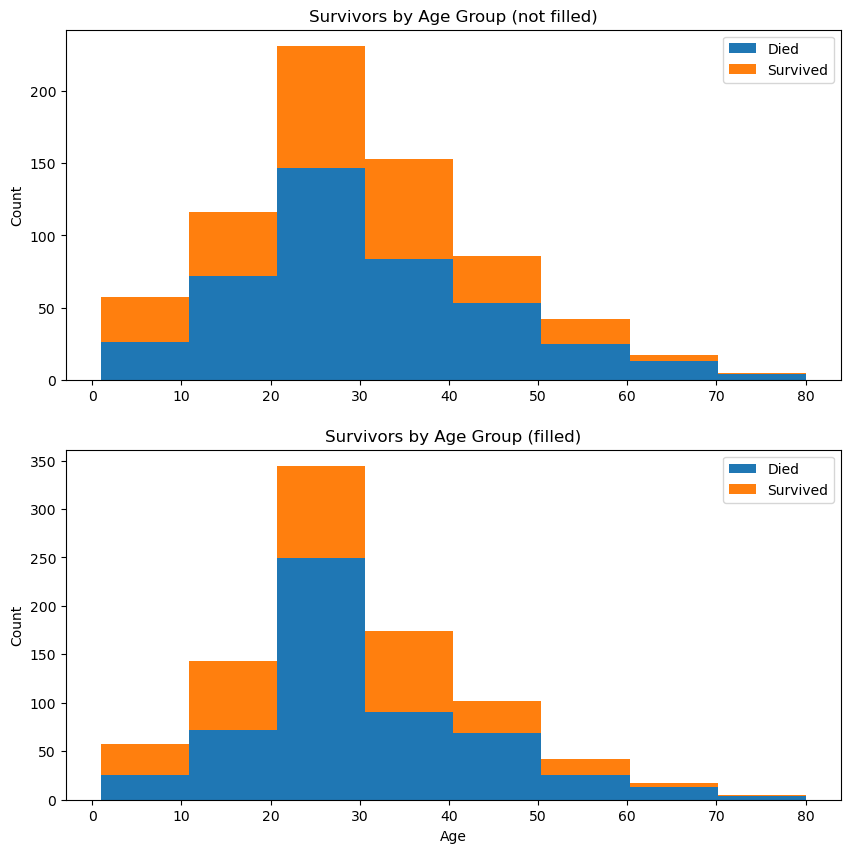

In [63]:
# Setup a figue of plots

df1 = titanic_df[titanic_df['Survived'] == 0]['Age']
df2 = titanic_df[titanic_df['Survived'] == 1]['Age']
df3 = titanic_df[titanic_df['Survived'] == 0]['Age_Fill']
df4 = titanic_df[titanic_df['Survived'] == 1]['Age_Fill']

max_age = max(titanic_df['Age_Fill'])

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax1.hist([df1, df2],
             bins=8,
             range=(1, max_age),
             stacked=True)

ax1.legend(('Died', 'Survived'), loc='best')
ax1.set_title('Survivors by Age Group (not filled)')
ax1.set_ylabel('Count')


ax2.hist([df3, df4],
             bins=8,
             range=(1, max_age),
             stacked=True)

ax2.legend(('Died', 'Survived'), loc='best')
ax2.set_title('Survivors by Age Group (filled)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')

plt.show()

In [64]:
# Maximum age
titanic_df['Age'].max()

80.0

In [65]:
# Create a new column that has all ages by bin category: 0-10:10, 10-20:20, 20-30:30, 30-40:40
# 40-50:50, 50-60:60, 60-70:70, 70-80:80
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
group_names = [10, 20, 30, 40, 50, 60, 70, 80]

titanic_df['Age_Categories'] = pd.cut(titanic_df['Age_Fill'], bins, labels=group_names)

titanic_df[['Age', 'Age_Fill', 'Age_Categories']].head()

,Age,Age_Fill,Age_Categories
0,22.0,22.0,30
1,38.0,38.0,40
2,26.0,26.0,30
3,35.0,35.0,40
4,35.0,35.0,40


In [66]:
titanic_df['Age_Categories'] = pd.to_numeric(titanic_df['Age_Categories'])

In [67]:
# Survival Count by Age_Categories
titanic_df.groupby('Survival')[['Age_Categories']].count()

,Age_Categories
Survival,
Died,549
Survived,342


#### Age Mosaic

In [68]:
# Survival count by Pclass
pclass_ct = titanic_df.groupby('Class')['Survival'].value_counts().unstack()
pclass_ct

Survival,Died,Survived
Class,,
1st Class,80,136
2nd Class,97,87
3rd Class,372,119


In [69]:
# Survival Rate
titanic_df.groupby('Class')['Survival'].value_counts(normalize = True).unstack()

Survival,Died,Survived
Class,,
1st Class,0.370370,0.629630
2nd Class,0.527174,0.472826
3rd Class,0.757637,0.242363


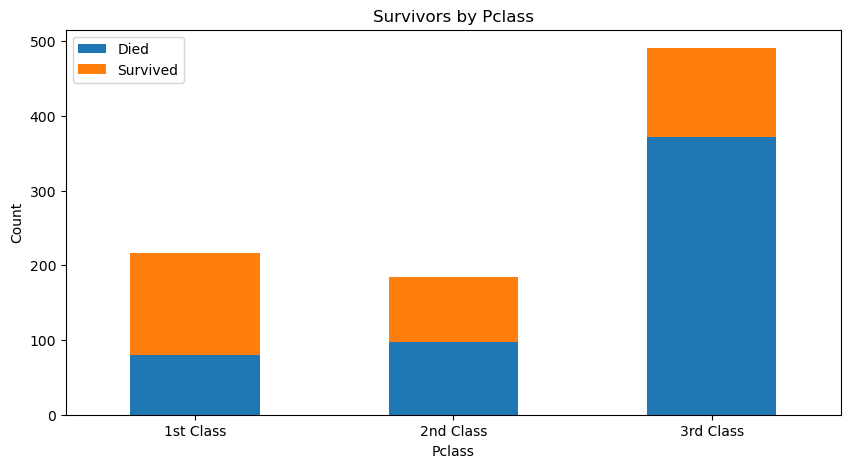

In [70]:
# Setup a figure of plots
pclass_ct.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

#### Sex

In [71]:
# Survival count by sex
sex_ct = titanic_df.groupby('Gender')['Survival'].value_counts().unstack()
sex_ct

Survival,Died,Survived
Gender,,
Female,81,233
Male,468,109


In [72]:
# Survival rate by sex
titanic_df.groupby('Gender')['Survival'].value_counts(normalize = True).unstack()

Survival,Died,Survived
Gender,,
Female,0.257962,0.742038
Male,0.811092,0.188908


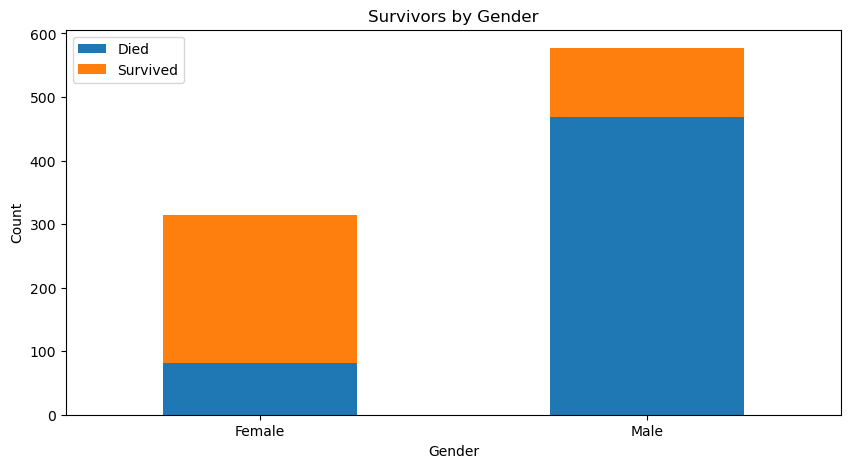

In [73]:
sex_ct.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

#### Embarked

In [74]:
# Survival count by Embarked

embarked_ct = titanic_df.groupby('Ports')['Survival'].value_counts().unstack()
embarked_ct

Survival,Died,Survived
Ports,,
Cherbourg,75.0,93.0
Queenstown,47.0,30.0
Southhampton,427.0,217.0
unknown,NaN,2.0


In [75]:
# Survival rate by embarked

titanic_df.groupby('Ports')['Survival'].value_counts(normalize = True).unstack()

Survival,Died,Survived
Ports,,
Cherbourg,0.446429,0.553571
Queenstown,0.610390,0.389610
Southhampton,0.663043,0.336957
unknown,NaN,1.000000


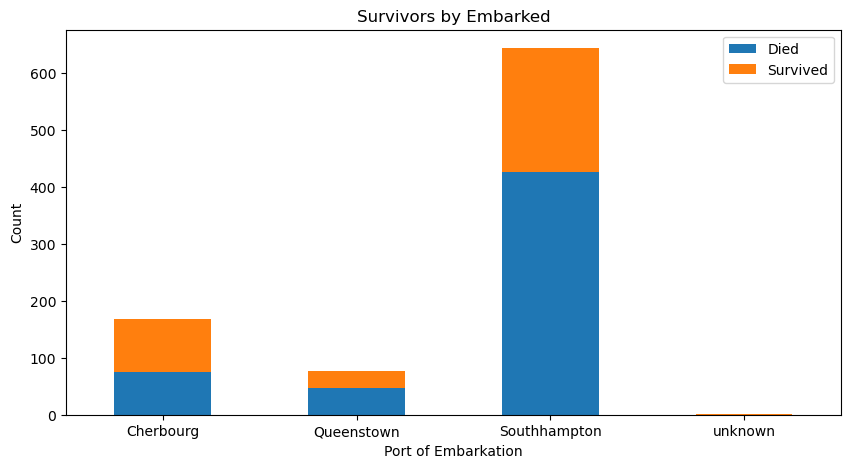

In [76]:
plt.rc('figure', figsize=(10, 5))

embarked_ct.plot(kind='bar', stacked=True, figsize=(10, 5), rot=0)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Embarked')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')

plt.show()

### Statistics

In [77]:
# Survival count by Sex, Embarked_Numeric, Pclass and Age Category

embarked = titanic_df['Ports']
sex = titanic_df['Gender']
survived = titanic_df['Survival']
pclass = titanic_df['Class']
age_cat = titanic_df['Age_Categories']
pd.crosstab([sex, embarked, pclass], [survived, age_cat])

Survival                      Died                           Survived          \
Age_Categories                  10  20   30  40  50 60 70 80       10  20  30   
Gender Ports        Class                                                       
Female Cherbourg    1st Class    0   0    0   0   1  0  0  0        0   5  10   
                    2nd Class    0   0    0   0   0  0  0  0        1   2   4   
                    3rd Class    1   3    3   0   1  0  0  0        5   8   2   
       Queenstown   1st Class    0   0    0   0   0  0  0  0        0   0   0   
                    2nd Class    0   0    0   0   0  0  0  0        0   0   2   
                    3rd Class    0   1    5   3   0  0  0  0        0  23   1   
       Southhampton 1st Class    1   0    1   0   0  0  0  0        0   8  10   
                    2nd Class    0   0    3   1   1  1  0  0        7   6  21   
                    3rd Class   10   8   25   5   7  0  0  0        6   7  13   
       unknown      1st Class    0   0    0   0   0  0  0  0        0   0   0   
Male   Cherbourg    1st Class    0   1    6   3   8  4  1  2        0   1   5   
                    2nd Class    0   0    4   4   0  0  0  0        1   1   0   
                    3rd Class    0   4   23   5   1  0  0  0        1   3   6   
       Queenstown   1st Class    0   0    0   0   1  0  0  0        0   0   0   
                    2nd Class    0   0    0   0   0  1  0  0        0   0   0   
                    3rd Class    4   1   25   3   1  0  1  1        0   0   3   
       Southhampton 1st Class    0   2    4   9  22  6  8  0        2   1   4   
                    2nd Class    0   9   29  26   8  8  2  0        8   2   0   
                    3rd Class   10  42  120  34  18  5  1  1        7   4  14   

Survival                                       
Age_Categories                 40 50 60 70 80  
Gender Ports        Class                      
Female Cherbourg    1st Class  14  7  6  0  0  
                    2nd Class   0  0  0  0  0  
                    3rd Class   0  0  0  0  0  
       Queenstown   1st Class   1  0  0  0  0  
                    2nd Class   0  0  0  0  0  
                    3rd Class   0  0  0  0  0  
       Southhampton 1st Class  17  5  5  1  0  
                    2nd Class  16  9  2  0  0  
                    3rd Class   6  0  0  1  0  
       unknown      1st Class   1  0  0  1  0  
Male   Cherbourg    1st Class   6  3  2  0  0  
                    2nd Class   0  0  0  0  0  
                    3rd Class   0  0  0  0  0  
       Queenstown   1st Class   0  0  0  0  0  
                    2nd Class   0  0  0  0  0  
                    3rd Class   0  0  0  0  0  
       Southhampton 1st Class  12  6  2  0  1  
                    2nd Class   3  1  0  1  0  
                    3rd Class   7  2  0  0  0